## Tensorflow 2.0 - Airlines Passanger Predictions Using RNN-LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv("data/AirPassengers.csv")
dataset = dataset["#Passengers"]
dataset = np.array(dataset).reshape(-1, 1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

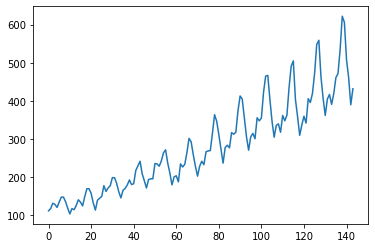

In [3]:
plt.plot(dataset)
# We will use upto 100 months as a training dataset and after 100 months as testing dataset

In [4]:
# Converting dataset between 0 and 1
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [5]:
# Split into Test and Train dataset
train_size = 100
test_size = 44

In [6]:
train = dataset[0:train_size, :]
test = dataset[train_size:, :]

In [7]:
train.shape, test.shape

((100, 1), (44, 1))

In [8]:
# Building Test and Training Dataset
def get_data(dataset, look_back):
    
    dataX, dataY = [], []

    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1

In [10]:
x_train, y_train = get_data(train, look_back)
x_test, y_test = get_data(test, look_back)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((98, 1), (98,), (42, 1), (42,))

In [12]:
x_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [13]:
# Converting 2D to 3D dataset
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [14]:
x_train.shape, x_test.shape

((98, 1, 1), (42, 1, 1))

In [15]:
# Build The Model
model = Sequential()

model.add(LSTM(units=5, input_shape=(1, look_back)))

model.add(Dense(1))

In [16]:
model.compile(loss="mean_squared_error", optimizer = "adam")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, epochs = 50, batch_size = 1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 6s 63ms/sample - loss: 0.0424
Epoch 2/50
98/98 [==============================] - 1s 8ms/sample - loss: 0.0190
Epoch 3/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0145
Epoch 4/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0132
Epoch 5/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0120
Epoch 6/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0109
Epoch 7/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0098
Epoch 8/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0087
Epoch 9/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0076
Epoch 10/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0068
Epoch 11/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0058
Epoch 12/50
98/98 [==============================] - 1s 7ms/sample - loss: 0.0050
Epoc

In [19]:
y_pred = model.predict(x_test)

In [20]:
scaler.scale_

array([0.0019305])

In [21]:
y_pred = scaler.inverse_transform(y_pred)

In [22]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

In [23]:
y_pred

array([[349.6663 ],
       [413.57498],
       [453.05063],
       [454.85147],
       [396.6562 ],
       [341.89346],
       [300.82742],
       [331.17313],
       [335.0754 ],
       [313.5695 ],
       [356.44827],
       [342.86627],
       [357.41556],
       [425.6564 ],
       [476.1974 ],
       [488.41776],
       [396.6562 ],
       [353.544  ],
       [305.7298 ],
       [332.1491 ],
       [354.5125 ],
       [337.0249 ],
       [398.5464 ],
       [389.071  ],
       [411.70575],
       [459.3388 ],
       [524.8375 ],
       [533.87775],
       [451.24658],
       [399.49054],
       [356.44827],
       [397.60162],
       [408.8968 ],
       [384.31122],
       [410.7701 ],
       [449.4393 ],
       [459.3388 ],
       [514.00726],
       [583.4531 ],
       [571.21704],
       [491.01367],
       [449.4393 ]], dtype=float32)

In [24]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

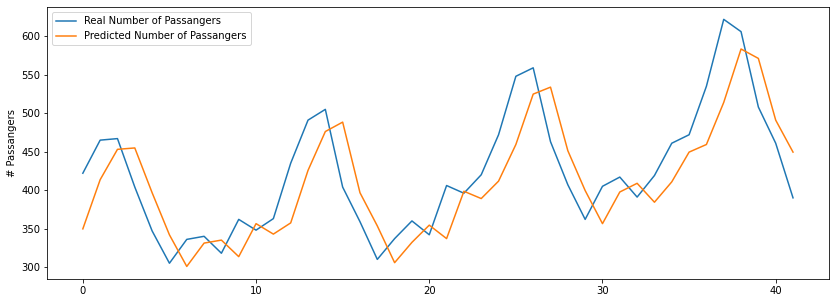

In [25]:
# Plot baselines and predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test, label="Real Number of Passangers")
plt.plot(y_pred, label="Predicted Number of Passangers")
plt.ylabel("# Passangers")
plt.legend()
plt.show()